#### importing libraries

In [1]:
import pandas as pd  # pandas: data manipulation and analysis library
import numpy as np  # numpy: numerical computing library providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions
import seaborn as sns  # seaborn: data visualization library based on matplotlib, providing a high-level interface 
import matplotlib.pyplot as plt # matplotlib: 2D plotting library for creating static, interactive, and animated visualizations in Python
import missingno as msno # missingno: data visualization library for visualizing missing data patterns in datasets


#### loading data and explore  values

In [2]:
df = pd.read_csv("C:\\Users\\midoo\\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#### explore #_rows,#_null values,datatypes of columns

In [3]:
df.info()
df[df['Reviews'].str.contains('M')]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10843 non-null  object 
 1   Category        10843 non-null  object 
 2   Rating          9369 non-null   float64
 3   Reviews         10843 non-null  object 
 4   Size            10843 non-null  object 
 5   Installs        10843 non-null  object 
 6   Type            10842 non-null  object 
 7   Price           10843 non-null  object 
 8   Content Rating  10843 non-null  object 
 9   Genres          10843 non-null  object 
 10  Last Updated    10843 non-null  object 
 11  Current Ver     10835 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0 M,"1,000+",Free,0,Everyone,Everyone,11-Feb-18,1.0.19,4.0 and up,4.2 and up
10841,social,social,4.6,3.9 M,5.1M,10000,fFree,0,Everyone,Social,1/20/2017,1,4.0 and up
10842,m&a,FAMILY,4.6,3.2 M,1M,1200,Free,0,Everyone,Education,1/19/2015,1,4.1 and up


## Data Cleaning

### 1. Which of the following column(s) has/have null values?

#### quick visualization by missingno library


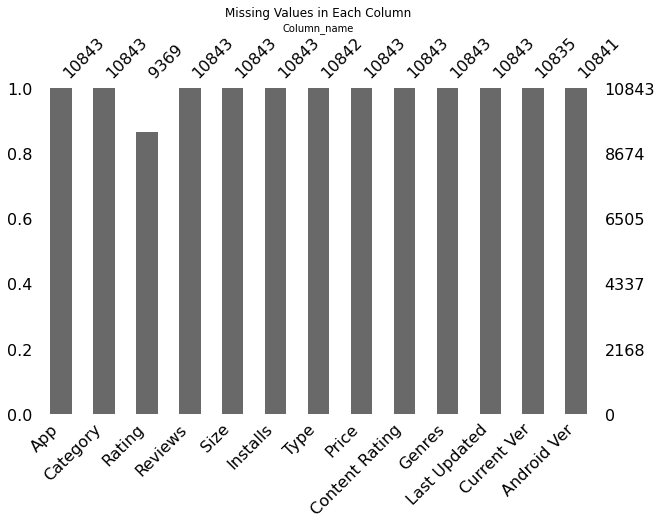

In [4]:
# Visualize missing values in each column using the missingno library, with a plot size of 10x6 inches.
msno.bar(df, figsize=(10, 6)) 
# Set the title of the plot to 'Missing Values in Each Column'.
plt.title('Missing Values in Each Column')  
# Set the label for the x-axis to 'Column_name', indicating the name of the columns in the DataFrame.
plt.xlabel('Column_name')  
# Set the label for the y-axis to 'Count of Missing Values', indicating the number of missing values in each column.
plt.ylabel('Count of Missing Values')  
# Display the plot.
plt.show() 


In [5]:
#Highlighting columns with missing data by using isnull func to indicate null values along column axis by any func
df.columns[df.isnull().any(axis=0)]
#another approach 
#using isna func to bring null values in columns and get # of null values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#### Remove the invalid values from Rating (if any). Just set them as NaN.

##### let's use histogram to see invalid values

<AxesSubplot:ylabel='Frequency'>

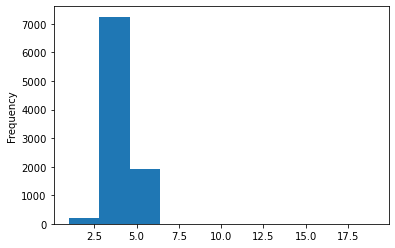

In [6]:
df['Rating'].plot(kind='hist')
#as we know the rating range between (1,5) but we see there are values more than 5 so we must replace it with nan

In [7]:
# we can see that there are values like 19 which is outlires
df.describe()

,Rating
count,9369.000000
mean,4.193425
std,0.537407
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
#replace any value in rating column with nan by using mask method allows you to selectively replace values in a 
#DataFrame based on a condition, while leaving other values unchanged
df['Rating'] = df['Rating'].mask(df['Rating'] > 5, np.nan)
#another appraoch 
# based on condition rating>5 replace value in rating column with nan
df.loc[df['Rating']>5,'Rating']=np.nan

#### visuallize result

<AxesSubplot:ylabel='Frequency'>

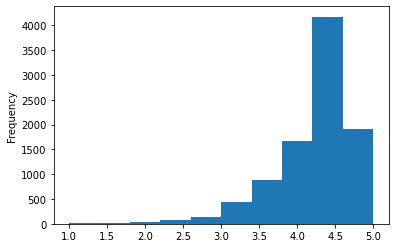

In [9]:
df['Rating'].plot(kind='hist')
# as we can see the values between (1,5)

In [10]:
df.describe()
# checking min and max values which now are valid values


,Rating
count,9368.000000
mean,4.191845
std,0.515198
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


#### Fill the null values in the Rating column using the mean()


In [11]:
#calculate the mean of rating column by neglect any null values 
mean=df['Rating'].mean()
#replace any nan value with mean in rating column
df['Rating']=df['Rating'].replace(np.nan, mean)

#### visualize result

<AxesSubplot:>

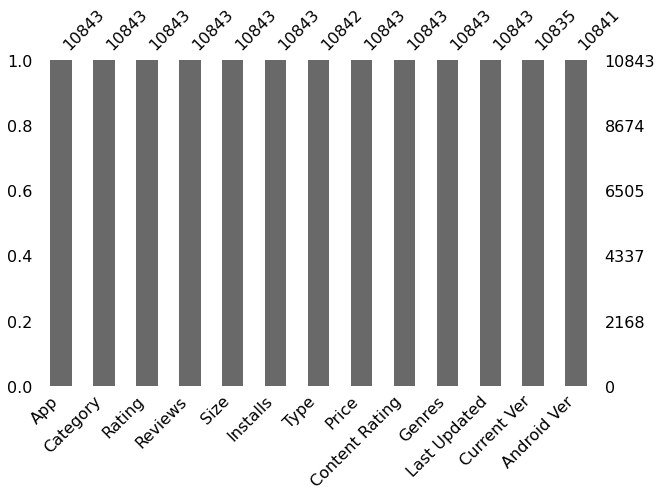

In [12]:
#check the # of null value in rating which is done
msno.bar(df, figsize=(10, 6)) 

#### Clean any other non-numerical columns by just dropping the values

<AxesSubplot:>

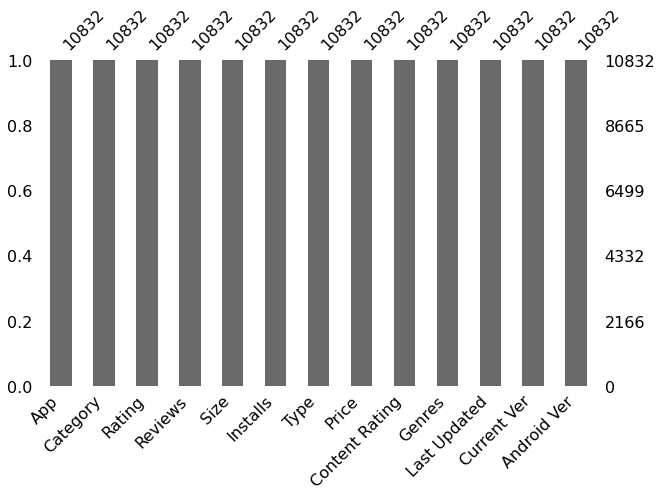

In [13]:
# select all rows along row axis contain at least one null value and reverse the answer 
df=df[~df.isnull().any(axis=1)]
#another approach 
df.dropna(inplace=True)
# as we can see we get only the row which have only none null values
msno.bar(df, figsize=(10, 6)) 

In [14]:
#another check for the null values
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2. Clean the column Reviews and make it numeric

In [15]:
#we want to see if there are any value have character so we will neglect errors parameter to see where error pattern
#as we see from error there is character M add at the end of the value so we will explore it 
#df['rev'] = pd.to_numeric(df['Reviews'] )
#df[df['Reviews'].str.contains('M')]
#we will add new column 'rev' and pass errors as coerce to converts non-convertible data into NaN (Not a Number) values.
df['rev'] = pd.to_numeric(df['Reviews'],errors='coerce').astype('Int64')
#so any rev column have null value because non-convertible data
#df[df['rev'].isnull()]
#we will solve it by convert any M by multiplying it with 1000000 by bring nan in rev and split num until space ,convert it 
# to float and multiplying it with 1000000
df.loc[df['rev'].isnull(),'rev']=(df['Reviews'].str.split(' ').str[0]).astype(float )*1000000
#check if it is done and it work properly we convert M to 1000000
df[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.191845,3.0 M,"1,000+",Free,0,Everyone,Everyone,11-Feb-18,1.0.19,4.0 and up,4.2 and up,3000000
10841,social,social,4.600000,3.9 M,5.1M,10000,fFree,0,Everyone,Social,1/20/2017,1,4.0 and up,3900000
10842,m&a,FAMILY,4.600000,3.2 M,1M,1200,Free,0,Everyone,Education,1/19/2015,1,4.1 and up,3200000


### 3. How many duplicated apps are there?

In [16]:
#he asks for duplicated apps not dupliacated rows there are difference in the answer 
#we bring duplicated app and set keep to false to bring all duplicated
df[df.duplicated(subset=['App'],keep=False)].shape


(1979, 14)

### 4. Drop duplicated apps keeping the ones with the greatest number of reviews

In [17]:
df.sort_values(by=['App','rev'],ascending=False,inplace=True)
df.drop_duplicates(subset='App', keep='first',inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.700000,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up,11661
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.000000,19,3.2M,"10,000+",Free,0,Everyone,Tools,21-Oct-17,1,4.2 and up,19
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098,18M,"1,000,000+",Free,0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,22098
4362,💎 I'm rich,LIFESTYLE,3.800000,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,718
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.191845,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,414


### 5. Format the Category column

#### Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.

In [18]:
#we notice that there is 1.9 in category we will convert it into unknown
df['Category'].value_counts()

FAMILY                 1871
GAME                    946
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               107
ENTERTAINMENT            87
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           60
PARENTING                60
COMICS                   56
BEAUTY                   53
social                    1
1.9                       1
Name: Category, dtyp

In [19]:
#replace 1.9 with unknown by str.replace 
df['Category'] = df['Category'].str.replace('1.9', 'Unknown')
#replace any underscore with whitespace 
df['Category'] = df['Category'].str.replace('_', ' ')
#capitalize first letter only 
df['Category'] = df['Category'].str.capitalize()
#check the formatted column 
df['Category'].value_counts()

C:\Users\midoo\AppData\Local\Temp\ipykernel_17576\4200541971.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Category'] = df['Category'].str.replace('1.9', 'Unknown')


Family                 1871
Game                    946
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  240
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               107
Entertainment            87
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Unknown                   1
Name: Category, dtype: int64

#### 6. Clean and convert the Installs column to numeric type

In [20]:
df.head()
#we must replace + sign and , with wihtespace to easily convert it as numeric easily

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,Entertainment,4.700000,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up,11661
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,3.2M,"10,000+",Free,0,Everyone,Tools,21-Oct-17,1,4.2 and up,19
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18M,"1,000,000+",Free,0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,22098
4362,💎 I'm rich,Lifestyle,3.800000,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,718
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191845,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,414


In [21]:
#as we see replace + sign and , with wihtespace 
df['Installs']=df['Installs'].str.replace(',','').str.replace('+','')
df.head()

C:\Users\midoo\AppData\Local\Temp\ipykernel_17576\3324595137.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace(',','').str.replace('+','')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,Entertainment,4.700000,11661,4.0M,1000000,Free,0,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up,11661
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,3.2M,10000,Free,0,Everyone,Tools,21-Oct-17,1,4.2 and up,19
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18M,1000000,Free,0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,22098
4362,💎 I'm rich,Lifestyle,3.800000,718,26M,10000,Paid,$399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,718
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191845,414,59M,100000,Free,0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,414


In [22]:
# we easily convert column into numeric easily
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 882 to 8884
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9651 non-null   object 
 1   Category        9651 non-null   object 
 2   Rating          9651 non-null   float64
 3   Reviews         9651 non-null   object 
 4   Size            9651 non-null   object 
 5   Installs        9650 non-null   float64
 6   Type            9651 non-null   object 
 7   Price           9651 non-null   object 
 8   Content Rating  9651 non-null   object 
 9   Genres          9651 non-null   object 
 10  Last Updated    9651 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9651 non-null   object 
 13  rev             9651 non-null   Int64  
dtypes: Int64(1), float64(2), object(11)
memory usage: 1.1+ MB


#### 7. Clean and convert the Size column to numeric (representing bytes)

In [28]:
df.head(50)
#we notice that we have M refer to mega and k refer to kilo so we must replace M with 1024*1024 byte and kilo with 1024 byte
pd.to_numeric(df['Size'].str.replace('M','').str.replace('k',''))
#we get this error "Unable to parse string "Varies with device" at position 6 so we have a pure string 
#that is impossible to be replaced so we will convert it to 0 let's see how many if this value
df[df['Size']=="Varies with device"].count()
#we have about 1227 occurance of this string 
#we will convert it to 0
df['Size'] = df['Size'].replace('Varies with device', "0").astype(str)
# df.loc[df['Size'].str.contains('k'), 'Size']: Selects the values from the 'Size' column of the DataFrame df where the 'Size' values contain the letter 'k'.
#.str.replace('k', ''): Removes the letter 'k' from the selected values.
#pd.to_numeric(...): Converts the resulting strings into numeric values.
#* 1024: Multiplies the numeric values by 1024, presumably converting kilobytes to bytes.
#.astype(str): This converts the resulting numeric values (presumably in bytes) back to strings.
new_value = (pd.to_numeric(
    df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', '')
) * (1024 * 1024)).astype(str)
df.loc[df['Size'].str.contains('M'), 'Size'] = new_value

# Transform `k` to ~1k bytes
new_value = (pd.to_numeric(
    df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '')
) * 1024).astype(str)
df.loc[df['Size'].str.contains('k'), 'Size'] = new_value

# Get rid of `+` and `,`
df['Size'] = df['Size'].str.replace('+', '')
df['Size'] = df['Size'].str.replace(',', '')

# Finally transform to numeric:
df['Size'] = pd.to_numeric(df['Size'])
df.head(50)

C:\Users\midoo\AppData\Local\Temp\ipykernel_17576\1735192520.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Size'] = df['Size'].str.replace('+', '')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,Entertainment,4.700000,11661,4194304.0,1000000.0,Free,0,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up,11661
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,3355443.2,10000.0,Free,0,Everyone,Tools,21-Oct-17,1,4.2 and up,19
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18874368.0,1000000.0,Free,0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,22098
4362,💎 I'm rich,Lifestyle,3.800000,718,27262976.0,10000.0,Paid,$399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,718
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191845,414,61865984.0,100000.0,Free,0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,414
6420,감성학원 BL 첫사랑,Comics,4.400000,190,35651584.0,10000.0,Free,0,Everyone,Comics,17-Nov-17,3.2.1,3.0 and up,190
9222,英漢字典 EC Dictionary,Family,4.300000,55408,0.0,1000000.0,Free,0,Everyone,Education,8-Jan-18,Varies with device,Varies with device,55408
313,"漫咖 Comics - Manga,Novel and Stories",Comics,4.100000,12088,22020096.0,1000000.0,Free,0,Mature 17+,Comics,6-Jul-18,2.3.1,4.0.3 and up,12088
5698,日本AV历史,Books and reference,4.100000,215,31457280.0,10000.0,Free,0,Teen,Books & Reference,6-Mar-18,1.2,4.0 and up,215
10109,哈哈姆特不EY,Communication,4.191845,239,18874368.0,10000.0,Free,0,Everyone,Communication,31-Jul-18,1.3.4,4.4 and up,239


#### 8. Clean and convert the Price column to numeric

In [29]:
#we notice that paid app it's price has $sign and ,  so we must  first remove $ first and replace , with .
df['Price']=df['Price'].str.replace('$','').str.replace(',', '.')
# we face this error when we want to convert Unable to parse string "Everyone" at position 3850
#we convert this value with 0
df.loc[df['Price']=="Everyone",'Price']='0'
df['Price'] = pd.to_numeric(df['Price'])
df.head(50)

C:\Users\midoo\AppData\Local\Temp\ipykernel_17576\1926497249.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','').str.replace(',', '.')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,Entertainment,4.700000,11661,4194304.0,1000000.0,Free,0.00,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up,11661
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,3355443.2,10000.0,Free,0.00,Everyone,Tools,21-Oct-17,1,4.2 and up,19
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18874368.0,1000000.0,Free,0.00,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,22098
4362,💎 I'm rich,Lifestyle,3.800000,718,27262976.0,10000.0,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,718
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191845,414,61865984.0,100000.0,Free,0.00,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,414
6420,감성학원 BL 첫사랑,Comics,4.400000,190,35651584.0,10000.0,Free,0.00,Everyone,Comics,17-Nov-17,3.2.1,3.0 and up,190
9222,英漢字典 EC Dictionary,Family,4.300000,55408,0.0,1000000.0,Free,0.00,Everyone,Education,8-Jan-18,Varies with device,Varies with device,55408
313,"漫咖 Comics - Manga,Novel and Stories",Comics,4.100000,12088,22020096.0,1000000.0,Free,0.00,Mature 17+,Comics,6-Jul-18,2.3.1,4.0.3 and up,12088
5698,日本AV历史,Books and reference,4.100000,215,31457280.0,10000.0,Free,0.00,Teen,Books & Reference,6-Mar-18,1.2,4.0 and up,215
10109,哈哈姆特不EY,Communication,4.191845,239,18874368.0,10000.0,Free,0.00,Everyone,Communication,31-Jul-18,1.3.4,4.4 and up,239


#### 9. Paid or free?

In [30]:
#creating new column Distribution if price >0 then paid otherwise Free by using apply and lambda function
df['Distribution'] = df['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')
df
#along time with cleaning 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev,Distribution
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,Entertainment,4.700000,11661,4194304.0,1000000.0,Free,0.00,Everyone,Entertainment,14-Jul-18,1.1.3.2,4.0.3 and up,11661,Free
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,3355443.2,10000.0,Free,0.00,Everyone,Tools,21-Oct-17,1,4.2 and up,19,Free
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,18874368.0,1000000.0,Free,0.00,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,22098,Free
4362,💎 I'm rich,Lifestyle,3.800000,718,27262976.0,10000.0,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,718,Paid
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191845,414,61865984.0,100000.0,Free,0.00,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,414,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,/u/app,Communication,4.700000,573,55574528.0,10000.0,Free,0.00,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up,573,Free
4541,.R,Tools,4.500000,259,207872.0,10000.0,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up,259,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,23068672.0,1000000.0,Free,0.00,Everyone,Social,2-Aug-18,5.03,4.1 and up,40467,Free
324,#NAME?,Comics,3.500000,115,9542041.6,10000.0,Free,0.00,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up,115,Free


## Analysis

### 10. Which app has the most reviews?

In [126]:
#we get the maximum rev and bring the corresponding one 
df[df['rev']==df['rev'].max()]
#another approach sort_values by # of rev by dec 
res1=df[df['Category']=='Social'][['App', 'rev']].sort_values(by=['rev'], ascending=False).head(10)
res1


,App,rev
2544,Facebook,78158306
2604,Instagram,66577446
2610,Snapchat,17015352
2546,Facebook Lite,8606259
6373,VK,5793284
3945,Tik Tok - including musical.ly,5637451
2554,Google+,4831125
2552,Pinterest,4305441
10841,social,3900000
2592,Tango - Live Video Broadcast,3806669


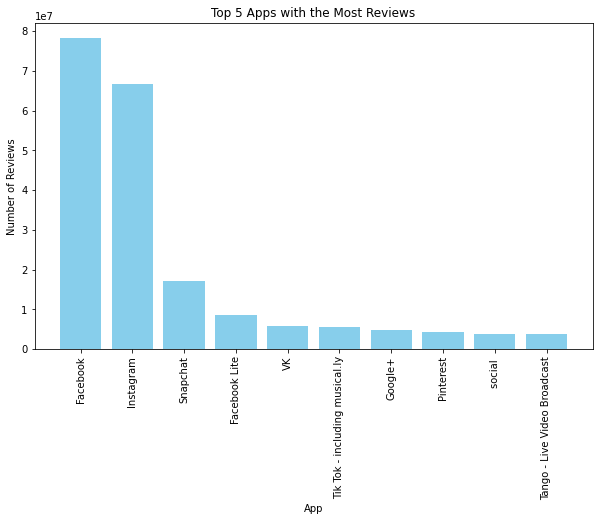

In [115]:
plt.figure(figsize=(10, 6))  # Creates a new figure with a specified size.
plt.bar(res1['App'], res1['rev'], color='skyblue')  # Plots a bar chart with 'App' on x-axis and 'rev' on y-axis, using sky blue color.
plt.xlabel('App')  # Sets the label for the x-axis.
plt.ylabel('Number of Reviews')  # Sets the label for the y-axis.
plt.title('Top 5 Apps with the Most Reviews')  # Sets the title for the plot.
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees for better readability.
plt.show()  # Displays the plot.


#### interpreting the vizuallization

In [133]:
#as we see there are gap between # of reviews between(facebook,instgram) and other top 8 social media apps 
# my hypothesis the # of installs play important role in this explination ,i see there is correlation between this two 
# variables # of reviews and # number of installs we will see and check for this 


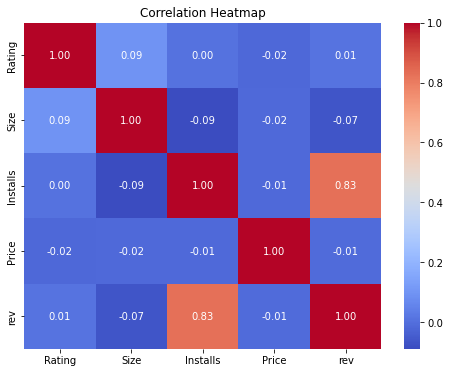

In [132]:
# bring data only related to social category 
res2=df[df['Category']=='Social']
correlation_matrix = res2.corr()  # Calculate the correlation matrix for the DataFrame 'res2'.
plt.figure(figsize=(8, 6))  # Create a new figure for the heatmap with a specified size of 8x6 inches.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create a heatmap with Seaborn.
plt.title('Correlation Heatmap')  # Add a title to the heatmap.
plt.show()# Show the plot

In [ ]:
#The correlation coefficient of 0.83 suggests a strong linear relationship and positve correlation between the variables
# As installs variable increases, the rev tends to increase as well, and vice versa.
#so our assumption is that if # of installs increase ,# of reviews increase  

#### 11. What category has the highest number of apps uploaded to the store?

In [154]:
res3=df['Category'].value_counts().reset_index(name='num').head(10)
res3

,index,num
0,Family,1871
1,Game,946
2,Tools,827
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,369
8,Finance,345
9,Sports,325


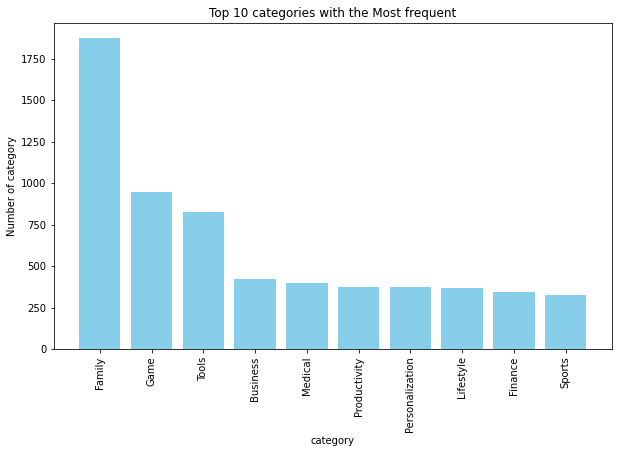

In [152]:
plt.figure(figsize=(10, 6))  # Creates a new figure with a specified size.
plt.bar(res3['index'], res3['num'], color='skyblue')  # Plots a bar chart with 'App' on x-axis and 'rev' on y-axis, using sky blue color.
plt.xlabel('category')  # Sets the label for the x-axis.
plt.ylabel('Number of category')  # Sets the label for the y-axis.
plt.title('Top 10 categories with the Most frequent')  # Sets the title for the plot.
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees for better readability.
plt.show()  # Displays the plot.


#### interpreting the vizuallization

In [ ]:
#we notice that occurance of family apps is double second highest category 'Game' why this whole gap 
#Family category may encompass a broad range of apps designed for families, here are seven specific subcategories or types of apps that might fall under the "Family" category
#Educational Apps for Kids,Entertainment for All Ages,Family Communication and Messaging,Health and Wellness,Travel and Leisure
#App Store Policies and Guidelines: App store policies and guidelines may influence developers' decisions to categorize 
#their apps. Developers may strategically choose the "Family" category for their apps to reach a broader audience 
#or to comply with content guidelines related to family-friendly content.
#Competition and Developer Focus: The competitive landscape within the "Family" category may also play a role.
#Developers may perceive the "Family" category  more lucrative, leading to a higher concentration of apps in this category.
#Monetization Strategies: The "Family" category may offer opportunities for developers to monetize their apps through various means
#such as subscription services, in-app purchases, or advertising targeted at families. 
#The potential for higher revenue streams may incentivize developers to prioritize the development and release of apps in this category.
#family category has all different ages so wide range of users ,so possibility to gain money more higher than other categories

#### 12. To which category belongs the most expensive app?

In [166]:
# filtering the DataFrame to find rows where the price matches the maximum price and then selecting the 'Category' column from these rows.
#df[df['Price']==df['Price'].max()][['Category']]
#another approach 
#sorting the rows by price column in descending order
df.sort_values(by='Price', ascending=False)[['App','Category','Price']].head(10)
# we notice that top 10  most expensive lies between  finance and lifestyle category  
#that because  Apps categorized under Finance typically appeal to individuals interested in wealth management
#investment, and financial success. The pricing of these apps may be justified by their purported ability to provide 
#financial insights, tools, or services that help users manage their money, make informed investment decisions, or achieve financial goals. 
#The high prices in this category may be perceived as an investment in one's financial future or a sign of commitment to financial responsibility
#: Apps categorized under Lifestyle often cater to personal interests, preferences,
#or aspirations beyond financial considerations. The pricing of these apps may be driven by factors such as exclusivity
#, luxury, status, or personal branding. Consumers purchasing apps in this category may be motivated by the desire to
#signal affluence, indulge in luxury, or simply own a rare or unique item. The high prices in this category may be perceived as a statement of personal style, taste, or identity..

,App,Category,Price
4367,I'm Rich - Trump Edition,Lifestyle,400.00
5358,I am Rich!,Finance,399.99
5364,I am rich (Most expensive app),Finance,399.99
4362,💎 I'm rich,Lifestyle,399.99
5369,I am Rich,Finance,399.99
5362,I Am Rich Pro,Family,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,Lifestyle,399.99
5373,I AM RICH PRO PLUS,Finance,399.99
5351,I am rich,Lifestyle,399.99
4197,most expensive app (H),Family,399.99


#### 13. What's the name of the most expensive game?

In [38]:
#filter rows by Game category and sort them by price in ascedning order 
b=df[df['Category']=='Game'].sort_values(by='Price', ascending=False).head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev,Distribution
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000.0,Paid,17.99,Everyone 10+,Arcade,14-Dec-15,1.0.4,4.0 and up,4108,Paid
10782,Trine 2: Complete Story,Game,3.8,252,11534336.0,10000.0,Paid,16.99,Teen,Action,27-Feb-15,2.22,5.0 and up,252,Paid
6341,Blackjack Verite Drills,Game,4.6,17,4928307.2,100.0,Paid,14.00,Teen,Casino,9-Jul-17,1.1.10,3.0 and up,17,Paid
1838,Star Wars ™: DIRTY,Game,4.5,38207,15728640.0,100000.0,Paid,9.99,Teen,Role Playing,19-Oct-15,1.0.6,4.1 and up,38207,Paid
6198,Backgammon NJ for Android,Game,4.4,1644,15728640.0,10000.0,Paid,7.99,Everyone,Board,5-Apr-17,4.1,2.3.3 and up,1644,Paid


#### 14. Which is the most popular Finance App?

In [39]:
df[df['Category']=='Finance'].sort_values(by='Installs', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev,Distribution
5601,Google Pay,Finance,4.2,348132,0.0,100000000.0,Free,0.0,Everyone,Finance,26-Jul-18,2.70.206190089,Varies with device,348132,Free
1156,PayPal,Finance,4.3,659760,49283072.0,50000000.0,Free,0.0,Everyone,Finance,18-Jul-18,6.28.0,4.4 and up,659760,Free
1081,İşCep,Finance,4.5,381788,33554432.0,10000000.0,Free,0.0,Everyone,Finance,2-Aug-18,3.22.0,4.1 and up,381788,Free
1168,Wells Fargo Mobile,Finance,4.4,250719,38797312.0,10000000.0,Free,0.0,Everyone,Finance,31-Jul-18,6.8.0.109,5.0 and up,250719,Free
1056,CASHIER,Finance,3.3,335738,0.0,10000000.0,Free,0.0,Everyone,Finance,3-May-18,Varies with device,Varies with device,335738,Free


#### 15. What Teen Game has the most reviews?

In [44]:
#filter Content Rating with teen and Category with Game and sort by reviews decending 
df[(df['Content Rating']=='Teen')& (df['Category']=='Game')].sort_values(by='rev', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev,Distribution
3912,Asphalt 8: Airborne,Game,4.5,8389714,96468992.0,100000000.0,Free,0.0,Teen,Racing,4-Jul-18,3.7.1a,4.0.3 and up,8389714,Free
5417,Mobile Legends: Bang Bang,Game,4.4,8219586,103809024.0,100000000.0,Free,0.0,Teen,Action,24-Jul-18,1.2.97.3042,4.0.3 and up,8219586,Free
1988,Hungry Shark Evolution,Game,4.5,6074627,104857600.0,100000000.0,Free,0.0,Teen,Arcade,25-Jul-18,6.0.0,4.1 and up,6074627,Free
10327,Garena Free Fire,Game,4.5,5534114,55574528.0,100000000.0,Free,0.0,Teen,Action,3-Aug-18,1.21.0,4.0.3 and up,5534114,Free
3967,Pixel Gun 3D: Survival shooter & Battle Royale,Game,4.5,4487182,57671680.0,50000000.0,Free,0.0,Teen,Action,4-Jul-18,15.1.2,4.0.3 and up,4487182,Free


#### 16. Which is the free game with the most reviews?

In [45]:
#filter distibution with Free and Category with Game and sort by reviews decending 
df[(df['Distribution']=='Free')& (df['Category']=='Game')].sort_values(by='rev', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev,Distribution
1879,Clash of Clans,Game,4.6,44893888,102760448.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up,44893888,Free
1872,Subway Surfers,Game,4.5,27725352,79691776.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up,27725352,Free
1878,Clash Royale,Game,4.6,23136735,101711872.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,27-Jun-18,2.3.2,4.1 and up,23136735,Free
1869,Candy Crush Saga,Game,4.4,22430188,77594624.0,5.000000e+08,Free,0.0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up,22430188,Free
1908,My Talking Tom,Game,4.5,14892469,0.0,5.000000e+08,Free,0.0,Everyone,Casual,19-Jul-18,4.8.0.132,4.1 and up,14892469,Free


#### 17. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?¶

In [54]:
#sort by # of installs in category of life style and get the maximum # of installs
m_l=df[df['Category']=='Lifestyle'].sort_values(by='Installs', ascending=False).head(1)
#total transfer by #_installs*size and convert the value from bytes into TB by transfer from byte to kilo to mega to giga to TB
res=(m_l['Installs']*m_l['Size'])/(1024*1024*1024*1024)
res

4587    6484.985352
dtype: float64